In [1]:
import tensorboard
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import random

/home/dexter/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.callbacks import TensorBoard

In [3]:
from keras.datasets import mnist

In [4]:
from keras.models import Sequential
from keras.layers import MaxPool2D,Conv2D,Flatten,Dropout,Dense,LeakyReLU
from keras import backend as K

In [15]:
batch=50
epochs=12
classes = 10

(x_train,y_train),(x_test,y_test)=mnist.load_data()



In [6]:
img_rows, img_cols = 28, 28

In [17]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [18]:

x_train =x_train.astype('float32')
x_test=x_test.astype('float32')



x_train/=255
x_test/=255


In [9]:
tensor_board = TensorBoard('./logs/try-MNIST-1')

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [19]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [12]:
model=Sequential()

model.add(Conv2D(128, (4,4),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(LeakyReLU(3))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256,activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [21]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

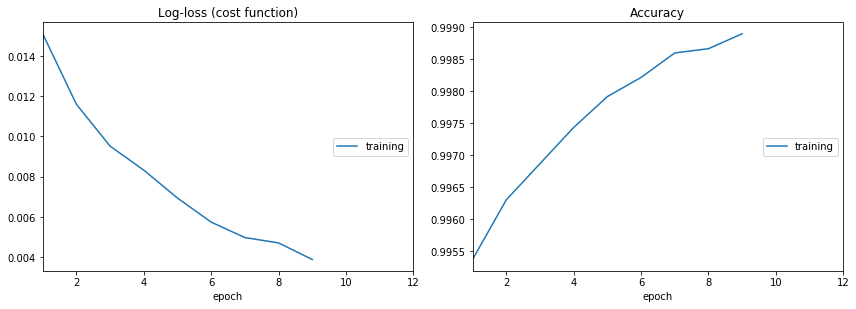

Epoch 10/12
  650/60000 [..............................] - ETA: 7:30 - loss: 5.9224e-04 - acc: 1.0000

In [ ]:
model.fit(x_train,y_train,
          batch_size=batch,
          epochs=epochs,
          verbose=1,
         callbacks=[PlotLossesKeras()])